In [65]:
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import datetime

In [66]:
def get_prices(ticker,startdate,enddate):
    prices_df = web.get_data_yahoo(ticker,
                               start = startdate,
                               end = enddate)
    prices_df = prices_df.drop(columns=['High', 'Low','Open','Close','Volume'])
    return prices_df

def bollinger_bands(prices,ticker):
    prices['20 Day MA'] = prices['Adj Close'].rolling(window=20).mean()
    
    # set .std(ddof=0) for population std instead of sample
    prices['20 Day STD'] = prices['Adj Close'].rolling(window=20).std() 
    
    prices['Upper Band'] = prices['20 Day MA'] + (prices['20 Day STD'] * 1.96)
    prices['Lower Band'] = prices['20 Day MA'] - (prices['20 Day STD'] * 1.96)

    # Simple Plot
    # set style, empty figure and axes
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111)

    # Get index values for the X axis for facebook DataFrame
    x_axis = prices.index.get_level_values(0)

    # Plot shaded 21 Day Bollinger Band for Facebook
    ax.fill_between(x_axis, prices['Upper Band'], prices['Lower Band'], color='grey')

    # Plot Adjust Closing Price and Moving Averages
    ax.plot(x_axis, prices['Adj Close'], color='blue', lw=2)
    ax.plot(x_axis, prices['20 Day MA'], color='black', lw=2)

    # Set Title & Show the Image
    ax.set_title('20 Day Bollinger Band For ' + ticker)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price(USD)')
    ax.legend(prices[['Adj Close', '20 Day MA']])
    plt.show()
    
def macd(prices, ticker):
    ema_12_period = prices['Adj Close'].ewm(span=12, adjust=False).mean()
    ema_26_period = prices['Adj Close'].ewm(span=26, adjust=False).mean()
    macd = ema_12_period - ema_26_period
    macd_ema_9_day = macd.ewm(span=9, adjust=False).mean()
    
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111)
    
    x_axis = prices.index.get_level_values(0)
    
    ax.plot(x_axis, macd, color='blue', lw=2)
    ax.plot(x_axis, macd_ema_9_day, color='red', lw=2)
    
    ax.set_title('MACD For ' + ticker)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price(USD)')
    ax.legend(['MACD','Signal Line'])
    plt.show()
    
def rsi(prices, ticker):
    # Window length for moving average
    window_length = 14

    # Get just the adjusted close
    close = prices['Adj Close']
    # Get the difference in price from previous step
    delta = close.diff()
    # Get rid of the first row, which is NaN since it did not have a previous
    # row to calculate the differences
#     delta = delta[1:]

    # Make the positive gains (up) and negative gains (down) Series
    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0

    # Calculate the EWMA
    roll_up1 = up.ewm(span=window_length).mean()
    roll_down1 = down.abs().ewm(span=window_length).mean()

    # Calculate the RSI based on EWMA
    RS1 = roll_up1 / roll_down1
    RSI1 = 100.0 - (100.0 / (1.0 + RS1))

    # Calculate the SMA
    roll_up2 = up.rolling(window_length).mean()
    roll_down2 = down.abs().rolling(window_length).mean()

    # Calculate the RSI based on SMA
    RS2 = roll_up2 / roll_down2
    RSI2 = 100.0 - (100.0 / (1.0 + RS2))
    
#     print(RSI1)
#     print()
#     print(RSI2)
    
    
    # Simple Plot
    # set style, empty figure and axes
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111)

    # Get index values for the X axis for facebook DataFrame
    x_axis = prices.index.get_level_values(0)

    # Plot Adjust Closing Price and Moving Averages
    ax.plot(x_axis, RSI1, color='blue', lw=2)
    ax.plot(x_axis, RSI2, color='red', lw=2)

    # Set Title & Show the Image
    ax.set_title('RSI For ' + ticker)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price(USD)')
    ax.legend(['RSI via EWMA', 'RSI via SMA'])
    plt.show()

Please input the stock ticker:MA
Please input the start date in YYYY-MM-DD format:2019-01-01
Please input the end date in YYYY-MM-DD format:2019-12-31


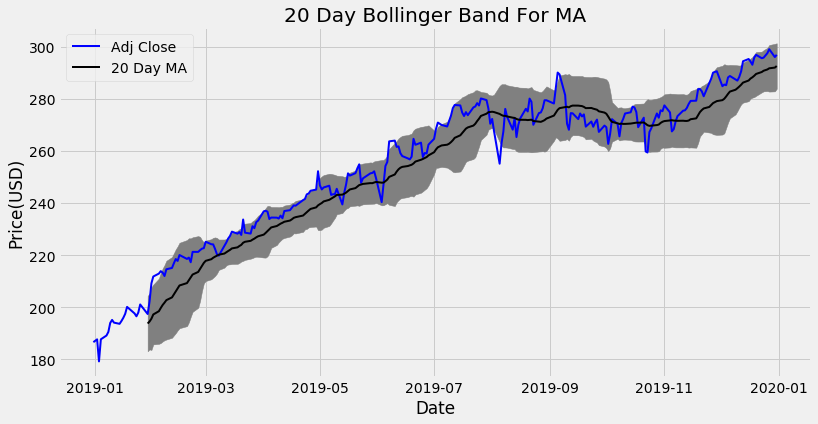

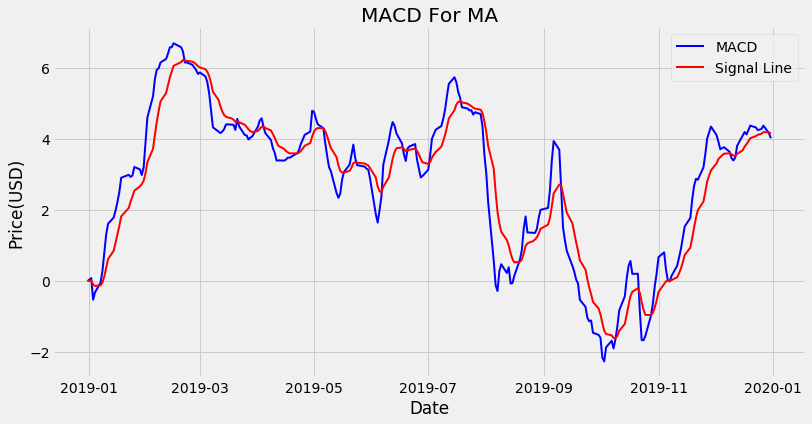

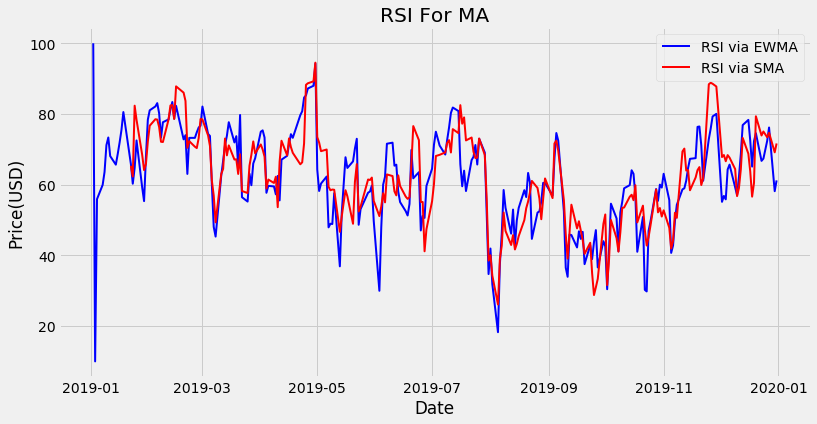

In [67]:
def main():
    
    ticker = input("Please input the stock ticker:").upper()
    startdate = input("Please input the start date in YYYY-MM-DD format:")
    enddate = input("Please input the end date in YYYY-MM-DD format:")

    prices = get_prices(ticker,startdate,enddate)
    bollinger_bands(prices,ticker)
    macd(prices,ticker)
    rsi(prices,ticker)

if __name__ == "__main__":
    main()